## IMD0033 - Probabilidade

# Trabalho I 

Este trabalho servirá como avaliação dos conteúdos relacionados a Estatística Descritiva.

Data de entrega: Até 23:59 do dia 17/04

Forma de entrega: Via SIGAA na forma de um jupyter notebook ou na forma de um documento em um editor de texto.

### Questão 1 (2 pontos)

Defina com suas palavras e de forma sucinta os termos abaixo:

a) População

Respota:

b) Amostra

Respota:

c) Conceito (em um desenho experimental)

Resposta:

d) Definição operacional

Resposta:

e) Experimento controlado

Resposta:

f) Desvio

Resposta:

g) Correção de Bessel

Resposta:

h) Outlier

Resposta:

### Questão 2 (2 pontos)

Reflita sobre as seguintes afirmações, indique se é verdadeiro ou falso e justifique:

a) Se o desvio padrão de um conjunto de dados é 0, podemos certamente afirmar que os dados encontram-se dispersos próximos da média.

Resposta:

b) A covariância é a média do quadrado dos desvios.

Resposta:

c) Quando transformamos os dados através do z-score, a moda dos dados transformados é sempre 0.

Resposta:

d) Ao analisar a correlação entre duas variáveis, se verificarmos uma correlação de 0.9, o que é considerada alta, não podemos afirmar que a variável dependente é a causa da variação nos valores da variável independente.

Resposta:

### Questão 3 (6 pontos)

Baixe o arquivo que se encontram neste [link](CO2_emission.txt). Este arquivo contém dados de emissão de CO2 em kT (quilotonelada) emitido pelos países ao longo no período de 2000 a 2014. Desconsiderando aqueles países que apresentam valores faltantes (".."), responda:

a) Qual foi o país que mais emitiu CO2 ao longo destes anos?

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

emissorCO2Data = pd.read_csv('CO2_emission.txt', sep='\t')
#apaga linhas com valores null
emissorCO2Data.dropna(inplace=True)

#retira espaços com 2 pontos
emissorCO2Data = emissorCO2Data.loc[(emissorCO2Data['2000 [YR2000]']!= ".." ) & (emissorCO2Data['2001 [YR2001]']!= ".." )& (emissorCO2Data["2002 [YR2002]"] != "..")& (emissorCO2Data["2003 [YR2003]"] != "..")& (emissorCO2Data["2004 [YR2004]"] != "..")& (emissorCO2Data["2005 [YR2005]"] != "..")& (emissorCO2Data["2006 [YR2006]"] != "..")& (emissorCO2Data["2008 [YR2008]"] != "..")& (emissorCO2Data["2009 [YR2009]"] != "..")& (emissorCO2Data["2010 [YR2010]"] != "..")& (emissorCO2Data["2011 [YR2011]"] != "..")& (emissorCO2Data["2012 [YR2012]"] != "..")& (emissorCO2Data["2013 [YR2013]"] != "..")& (emissorCO2Data["2014 [YR2014]"] != "..")]

camposImportantes = list(emissorCO2Data.columns.values)
camposImportantes.remove('Series Code')
camposImportantes.remove('Series Name')
camposImportantes.remove('Country Code')

anos = camposImportantes
anos.remove('Country Name')

#busca país com maior soma
linhaComMaiorSoma = 0
maiorSoma = 0
for i in range(len(emissorCO2Data)): #para cada pais
    soma = 0
    linhaNumpy = np.array(emissorCO2Data.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    soma = linhaNumpyFloat.sum()
    if(soma > maiorSoma):
        maiorSoma = soma
        linhaComMaiorSoma = i

print(emissorCO2Data.iloc[linhaComMaiorSoma]['Country Name'])

China


b) Qual foi o país que teve a menor média da taxa de emissão de CO2 ao longo destes anos?

In [49]:
#busca país com maior média
linhaComMenorMedia = 0
menorMedia = 0
for i in range(len(emissorCO2Data)): #para cada pais
    media = 0
    linhaNumpy = np.array(emissorCO2Data.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    media = linhaNumpyFloat.mean()
    if(media < menorMedia):
        menorMedia = media
        linhaComMenorMedia = i

print(emissorCO2Data.iloc[linhaComMenorMedia]['Country Name'])

Afghanistan


c) Quantos países conseguiram diminuir a emissão de CO2 durante este período? Em outras palavras, quantos países tiveram sua taxa média de emissão de CO2 menor que 1?

In [50]:
#buscar países com taxa média menor que 1
listaPaises = []
for i in range(len(emissorCO2Data)): #para cada pais
    linhaNumpy = np.array(emissorCO2Data.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    lista = []
    for j in range(len(linhaNumpyFloat)-1):
        #print(i)
        lista.append(linhaNumpyFloat[j+1] / linhaNumpyFloat[j])

    produtoLista = np.prod(lista)
    resultado = produtoLista ** (1 / (len(lista)))      
    if(resultado < 1):
        listaPaises.append(emissorCO2Data.iloc[i]['Country Name'])

data = {}
data["Países"] = listaPaises        
        
listaPaisesPd = pd.DataFrame(data)
listaPaisesPd

,Países
0,Andorra
1,Aruba
2,Austria
3,Belgium
4,Bulgaria
5,Croatia
6,Cyprus
7,Czech Republic
8,Denmark
9,Faroe Islands


d) Qual é a taxa média de emissão de CO2 do Brasil ao longo destes anos?

In [51]:
brasilNumpy = np.array(emissorCO2Data.loc[(emissorCO2Data['Country Name'] == "Brazil")][anos])
brasilNumpyFloat = brasilNumpy.astype(np.float)
# testeAplicacao = [[100, 150, 75]];
taxaMediaBrasileira = 0
lista = []
for i in range(len(brasilNumpyFloat[0])-1):
    #print(brasilNumpyFloat[0][i+1] / brasilNumpyFloat[0][i])
    lista.append(brasilNumpyFloat[0][i+1] / brasilNumpyFloat[0][i])

produtoLista = np.prod(lista)
taxaMediaBrasileira = produtoLista ** (1 / (len(lista)))      
print(taxaMediaBrasileira)


1.0348470342467841


e) A taxa média de emissão de CO2 entre os países segue aproximadamente uma distribuição normal como mostra o gráfico abaixo. Dos países que estamos analisando, quantos deles possuem a taxa média maior que a taxa média brasileira? 

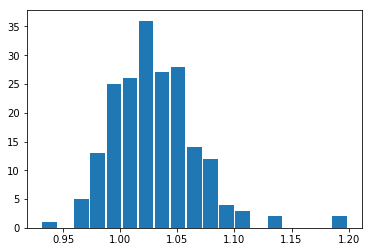

In [52]:
#busca país com maior média
listaPaises = []
for i in range(len(emissorCO2Data)): #para cada pais
    linhaNumpy = np.array(emissorCO2Data.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    lista = []
    for j in range(len(linhaNumpyFloat)-1):
        #print(i)
        lista.append(linhaNumpyFloat[j+1] / linhaNumpyFloat[j])

    produtoLista = np.prod(lista)
    resultado = produtoLista ** (1 / (len(lista)))      
    if(resultado > taxaMediaBrasileira):
        listaPaises.append(emissorCO2Data.iloc[i]['Country Name'])

len(listaPaises)

# print(emissorCO2Data.iloc[linhaComMenorMedia]['Country Name'])

79

f) A Noruega é um dos países que vem fazendo esforço para diminuir a emissão de CO2. Abaixo se encontra o gráfico que demonstra a quantidade de CO2 emitido por este país ao longo do período apresentado pelos dados. Tendo em mente este padrão de emissão de CO2 da Noruega, qual o país que possui um padrão de emissão de CO2 mais similar ao padrão da Noruega? Plote um gráfico que consiga demonstrar a semelhança dos padrões de emissão de CO2 entre os dois países. Plote também no mesmo gráfico o padrão de emissão de CO2 do país que seja menos similar ao padrão da Noruega.]


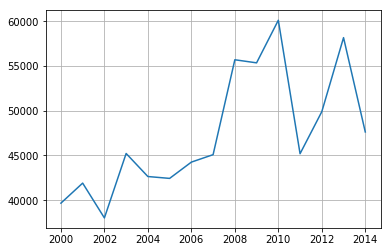

País com emissão mais próxima da Noruega: Bulgaria


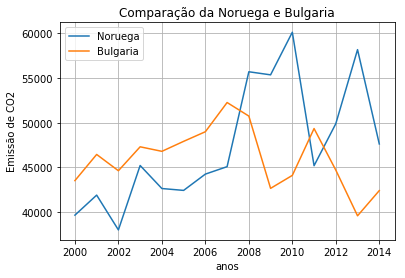

País com emissão mais distante da Noruega: China


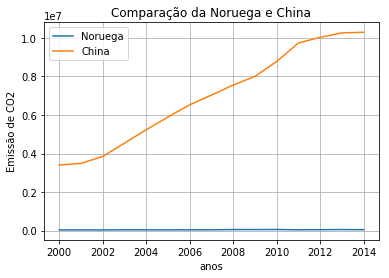

In [73]:
emissorCO2DataSemNoruega = emissorCO2Data.loc[(emissorCO2Data['Country Name'] != "Norway")]

NoruegaNumpy = np.array(emissorCO2Data.loc[(emissorCO2Data['Country Name'] == "Norway")][anos])
NoruegaNumpyFloat = NoruegaNumpy.astype(np.float)
NoruegaNumpyFloat

# arrayTeste = np.array([1, 2, 3, 4, 5])
# arrayProximo = np.array([1, 3, 2, 5, 6])
# arrayDistante = np.array([3, 4, 5, 6, 7])

# #print(arrayTeste < arrayProximo)

# teste = np.array([arrayProximo, arrayDistante, [1, 2, 3, 4, 5]])

# #buscar pais com configuracao mais proxima
paisMaisProximo = []
subtracaoPaisMaisProximo = []
for i in range(len(emissorCO2DataSemNoruega)): #para cada pais
    subtracao = []
    linhaNumpy = np.array(emissorCO2DataSemNoruega.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    #print(paisMaisProximo)
    if len(paisMaisProximo) == 0:
        paisMaisProximo = linhaNumpyFloat
        for j in range(len(paisMaisProximo)):
            subtracaoPaisMaisProximo.append(abs(paisMaisProximo[j] - NoruegaNumpyFloat[0][j]))
            
        subtracaoPaisMaisProximo = np.array(subtracaoPaisMaisProximo)
    else:        
        for j in range(len(linhaNumpyFloat)):
            subtracao.append(abs(linhaNumpyFloat[j] - NoruegaNumpyFloat[0][j]))
            
        subtracao = np.array(subtracao)
        
        verificarMenor = subtracao <= subtracaoPaisMaisProximo;
        
        #verifica se todos são verdadeiros
        if all(valor for valor in verificarMenor):
            subtracaoPaisMaisProximo = subtracao
            paisMaisProximo = emissorCO2DataSemNoruega.iloc[i]
                

print("País com emissão mais próxima da Noruega: " + paisMaisProximo['Country Name'])
# print(NoruegaNumpy[0])

linhaPaisMaisProximoNumpy = np.array(paisMaisProximo[anos])
linhaPaisMaisProximoNumpyFloat = linhaPaisMaisProximoNumpy.astype(np.float)

x = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
y = NoruegaNumpyFloat[0]
z = linhaPaisMaisProximoNumpyFloat
plt.plot(x,y, label="Noruega")
plt.plot(x,z, label=paisMaisProximo['Country Name'])
plt.title("Comparação da Noruega e " + paisMaisProximo['Country Name'])
plt.xlabel("anos")
plt.ylabel("Emissão de CO2")
plt.legend()
plt.grid()
plt.show()



# #buscar pais com configuracao mais proxima
paisMaisDistante = []
subtracaoPaisMaisDistante = []
for i in range(len(emissorCO2DataSemNoruega)): #para cada pais
    subtracao = []
    linhaNumpy = np.array(emissorCO2DataSemNoruega.iloc[i][anos])
    linhaNumpyFloat = linhaNumpy.astype(np.float)
    #print(paisMaisProximo)
    if len(paisMaisDistante) == 0:
        paisMaisDistante = linhaNumpyFloat
        for j in range(len(paisMaisDistante)):
            subtracaoPaisMaisDistante.append(abs(paisMaisDistante[j] - NoruegaNumpyFloat[0][j]))
            
        subtracaoPaisMaisDistante = np.array(subtracaoPaisMaisDistante)
    else:        
        for j in range(len(linhaNumpyFloat)):
            subtracao.append(abs(linhaNumpyFloat[j] - NoruegaNumpyFloat[0][j]))
            
        subtracao = np.array(subtracao)
        
        verificarMenor = subtracao >= subtracaoPaisMaisDistante;
        
        #verifica se todos são verdadeiros
        if all(valor for valor in verificarMenor):
            subtracaoPaisMaisDistante = subtracao
            paisMaisDistante = emissorCO2DataSemNoruega.iloc[i]
                

print("País com emissão mais distante da Noruega: " + paisMaisDistante['Country Name'])
# print(NoruegaNumpy[0])

linhaPaisMaisDistanteNumpy = np.array(paisMaisDistante[anos])
linhaPaisMaisDistanteNumpyFloat = linhaPaisMaisDistanteNumpy.astype(np.float)

x = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
y = NoruegaNumpyFloat[0]
z = linhaPaisMaisDistanteNumpyFloat
plt.plot(x,y, label="Noruega")
plt.plot(x,z, label=paisMaisDistante['Country Name'])
plt.title("Comparação da Noruega e " + paisMaisDistante['Country Name'])
plt.xlabel("anos")
plt.ylabel("Emissão de CO2")
plt.legend()
plt.grid()
plt.show()


